In [1]:
import pandas as pd
import os
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
import matplotlib.pyplot as plt

# Read in parsed information

In [2]:
input_directory = 'parsed'

file = os.path.join( input_directory, 'circles.csv')
circles = pd.read_csv( file )

file = os.path.join( input_directory, 'annotations.csv')
annotations = pd.read_csv( file )

file = os.path.join( input_directory, 'connections.csv')
connections = pd.read_csv( file )

file = os.path.join( input_directory, 'subclasses.csv')
subclasses = pd.read_csv( file )

file = os.path.join( input_directory, 'classes.csv')
classes = pd.read_csv( file )

In [3]:
cterm = classes.loc[0,'name']
cterm = '02 NP-CT-L6b Glut'

In [4]:
pred = (subclasses['parent_term_name'] == cterm)
nodes = subclasses.loc[pred,'node']

pred = [x in nodes for x in circles['node']]
points = circles.loc[pred][['x','y']].values

print(len(points))

8


In [5]:
points

array([[459.435, 354.605],
       [608.565, 162.585],
       [641.105, 228.895],
       [585.425, 200.505],
       [610.945, 300.515],
       [651.545, 263.975],
       [537.215, 247.605],
       [547.025, 205.235]])

In [6]:
hull = ConvexHull(points)

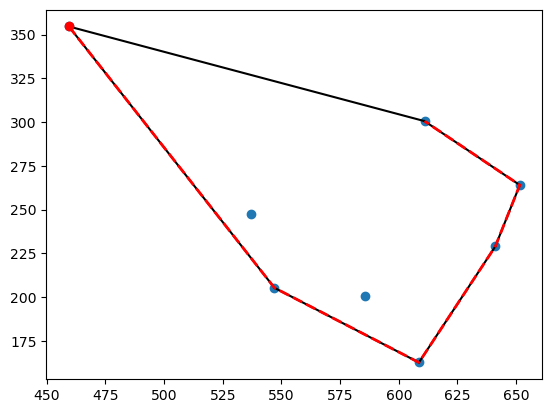

In [24]:
dd = plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')

plt.show()

In [40]:
(' ').join(['%0.2f,%0.2f' % (p[0],p[1]) for p in points[hull.vertices]])

'459.44,354.61 547.02,205.24 608.57,162.59 641.11,228.90 651.54,263.98 610.95,300.51'

In [36]:
connections.loc[0].points

'416.15,481.891 415.99,481.91 416.01,482.129 416.04,482.36       416.07,482.579 416.09,482.811 416.12,483.029 416.15,483.25 416.17,483.479 416.199,483.7 416.23,483.93 416.25,484.15       416.28,484.369 416.311,484.601 416.34,484.82 416.36,485.04 416.39,485.261 416.42,485.48 416.44,485.71 416.47,485.931       416.5,486.15 416.53,486.369 416.55,486.59 416.58,486.81 416.61,487.03 416.64,487.249 416.67,487.471 416.69,487.69       416.72,487.91 416.75,488.13 416.78,488.35 416.8,488.57 416.83,488.789 416.86,489.011 416.89,489.221 416.92,489.44       416.95,489.66 416.97,489.879 417,490.09 417.03,490.31 417.061,490.53 417.09,490.74 417.12,490.959 417.15,491.181       417.17,491.39 417.2,491.61 417.23,491.82 417.26,492.039 417.29,492.25 417.32,492.47 417.35,492.681 417.38,492.9       417.41,493.109 417.44,493.33 417.46,493.54 417.49,493.749 417.521,493.971 417.55,494.181 417.58,494.391 417.61,494.601       417.64,494.819 417.67,495.03 417.7,495.24 417.729,495.449 417.76,495.66 417.79,495.87 41